In [2]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# sarcasm.json
#!gdown --id 1dRzdJS7-cZS4S5CuUc32MZYSLJGkkxnp

In [7]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [8]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
____________________________________________________

In [11]:
num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.4727 - accuracy: 0.7577 - val_loss: 0.4079 - val_accuracy: 0.8147
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3596 - accuracy: 0.8390 - val_loss: 0.3943 - val_accuracy: 0.8222
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3225 - accuracy: 0.8585 - val_loss: 0.3979 - val_accuracy: 0.8256
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2891 - accuracy: 0.8740 - val_loss: 0.4025 - val_accuracy: 0.8216
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2533 - accuracy: 0.8952 - val_loss: 0.4201 - val_accuracy: 0.8195
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2228 - accuracy: 0.9101 - val_loss: 0.4550 - val_accuracy: 0.8070
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.1886 - accuracy: 0.9265 - val_loss: 0.5062 - val_accuracy: 0.8116
Epoch 

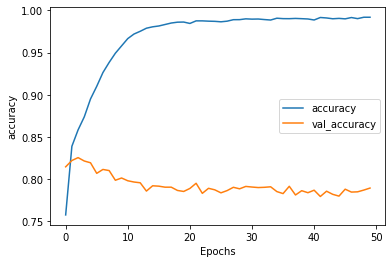

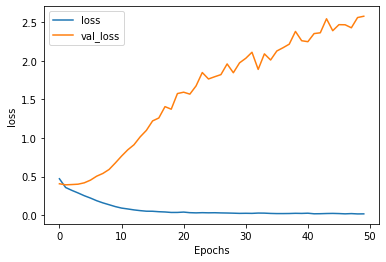

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [13]:
model.save("test.h5")

### LSTM Model

In [16]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model_conv.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 34s 49ms/step - loss: 0.4667 - accuracy: 0.7653 - val_loss: 0.3866 - val_accuracy: 0.8216
Epoch 2/50
625/625 [==============================] - 33s 53ms/step - loss: 0.3559 - accuracy: 0.8389 - val_loss: 0.3726 - val_accuracy: 0.8316
Epoch 3/50
625/625 [==============================] - 33s 53ms/step - loss: 0.3313 - accuracy: 0.8498 - val_loss: 0.3736 - val_accuracy: 0.8284
Epoch 4/50
625/625 [==============================] - 33s 53ms/step - loss: 0.3167 - accuracy: 0.8590 - val_loss: 0.3863 - val_accuracy: 0.8192
Epoch 5/50
625/625 [==============================] - 33s 53ms/step - loss: 0.3058 - accuracy: 0.8651 - val_loss: 0.3755 - val_accuracy: 0.8323
Epoch 6/50
625/625 [==============================] - 33s 53ms/step - loss: 0.2982 - accuracy: 0.8673 - val_loss: 0.3865 - val_accuracy: 0.8249
Epoch 7/50
625/625 [==============================] - 32s 52ms/step - loss: 0.2917 - accuracy: 0.8702 - val_loss: 0.4096 - val_accuracy:

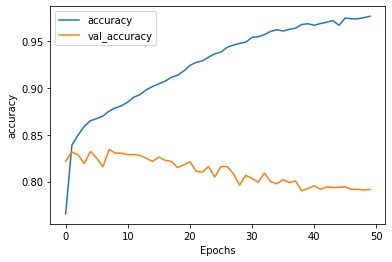

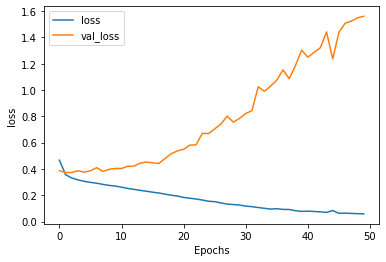

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
model.save("test_lstm.h5")

### GRU Model

In [21]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 27,185
Trainable params: 27,185
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model_gru.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 35s 50ms/step - loss: 0.4474 - accuracy: 0.7732 - val_loss: 0.4088 - val_accuracy: 0.8050
Epoch 2/50
625/625 [==============================] - 30s 49ms/step - loss: 0.3681 - accuracy: 0.8301 - val_loss: 0.3949 - val_accuracy: 0.8173
Epoch 3/50
625/625 [==============================] - 30s 48ms/step - loss: 0.3566 - accuracy: 0.8354 - val_loss: 0.3897 - val_accuracy: 0.8208
Epoch 4/50
625/625 [==============================] - 30s 49ms/step - loss: 0.3433 - accuracy: 0.8411 - val_loss: 0.3973 - val_accuracy: 0.8126
Epoch 5/50
625/625 [==============================] - 27s 43ms/step - loss: 0.3226 - accuracy: 0.8529 - val_loss: 0.3694 - val_accuracy: 0.8284
Epoch 6/50
625/625 [==============================] - 25s 41ms/step - loss: 0.3048 - accuracy: 0.8618 - val_loss: 0.3764 - val_accuracy: 0.8278
Epoch 7/50
625/625 [==============================] - 26s 41ms/step - loss: 0.2908 - accuracy: 0.8703 - val_loss: 0.3745 - val_accuracy:

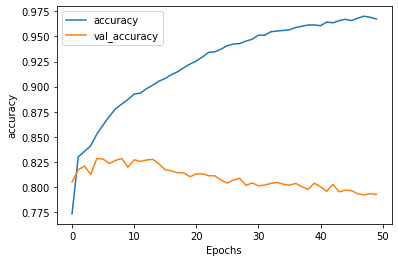

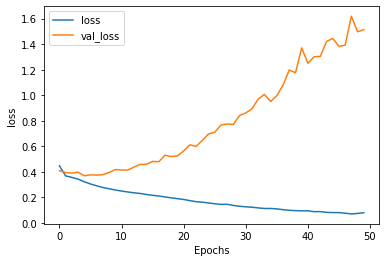

In [23]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
model.save("test_gru.h5")